In [1]:
# This will be for managing plots to make them look good.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Various data matrices.

# The x-axis, but for kernels I had to reduce it to ignore 50k or higher.
train_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 280000]
train_kernels = [10, 50, 100, 500, 1000, 5000, 10000]

# FIRST Let's put all the data together so that we have YES for BOTH the clipping AND the standardization!
# There are several trials. Each trial used the SAME testing set, along with the same training sets
# for each run at a specific training set size.

# TRIAL 1, from trial_01.txt
median_1 = [0.24934, 0.20888, 0.20762, 0.20768, 0.20768, 0.20757, 0.20757, 0.20757, 0.20757, 0.20757]
mean_1 = [0.07427, 0.05917, 0.05856, 0.05756, 0.05748, 0.05748, 0.05748, 0.05748, 0.05748, 0.05748]

abs_lin_1 = [0.352565, 0.279661, 0.408414, 0.429646, 0.280915, 0.135461, 0.13093, 0.128901, 0.12859, 0.128707]
abs_r10_1 = [0.348993, 0.280307, 0.40844, 0.429646, 0.280908, 0.135461, 0.13093, 0.129022, 0.128642, 0.128747]
abs_r02_1 = [0.348977, 0.279963, 0.40591, 0.359943, 0.229422, 0.135493, 0.130965, 0.129035, 0.128648, 0.12875]
abs_r06_1 = [0.348993, 0.280307, 0.40844, 0.427712, 0.280534, 0.135461, 0.13093, 0.129022, 0.128642, 0.128747]
abs_sgd_1 = [0.220623, 0.199198, 0.281391, 0.179017, 0.153984, 0.14661, 0.141834, 0.146773, 0.133694, 0.132174]
abs_ker_1 = [0.280822, 0.242032, 0.303861, 0.255539, 0.221621, 0.224964, 0.227299]

sqr_lin_1 = [0.200503, 0.138216, 0.265616, 0.288613, 0.152365, 0.029365, 0.027371, 0.026675, 0.026554, 0.026577]
sqr_r10_1 = [0.196198, 0.138853, 0.265686, 0.288613, 0.152378, 0.029365, 0.027371, 0.026703, 0.026568, 0.026571]
sqr_r02_1 = [0.196178, 0.138531, 0.263363, 0.225935, 0.102802, 0.029376, 0.027381, 0.026705, 0.026569, 0.026571]
sqr_r06_1 = [0.196198, 0.138853, 0.265685, 0.286892, 0.152034, 0.029365, 0.027371, 0.026703, 0.026568, 0.026571]
sqr_sgd_1 = [0.081836, 0.065075, 0.1297, 0.053443, 0.040128, 0.036642, 0.032692, 0.033644, 0.029009, 0.029114]
sqr_ker_1 = [0.127723, 0.098922, 0.152639, 0.11185, 0.082407, 0.084516, 0.085908]

# TRIAL 2, from trial_02.txt
median_2 = [0.24571, 0.21299, 0.21053, 0.21031, 0.21019, 0.21007, 0.21007, 0.21007, 0.21007, 0.21007]
mean_2 = [0.06053, 0.05969, 0.05946, 0.05894, 0.05879, 0.05879, 0.05879, 0.05880, 0.05879, 0.05879]

abs_lin_2 = [0.346354, 0.342815, 0.338534, 0.424267, 0.284709, 0.138185, 0.133517, 0.131682, 0.131253, 0.130762]
abs_r10_2 = [0.346357, 0.338736, 0.334662, 0.424267, 0.284658, 0.138185, 0.133517, 0.131716, 0.131188, 0.131064]
abs_r02_2 = [0.346351, 0.337443, 0.333873, 0.364438, 0.235897, 0.137946, 0.133445, 0.131709, 0.131181, 0.131062]
abs_r06_2 = [0.346357, 0.338736, 0.334662, 0.424093, 0.282794, 0.138185, 0.133517, 0.131716, 0.131188, 0.131064]
abs_sgd_2 = [0.272674, 0.229095, 0.199751, 0.164641, 0.160056, 0.146331, 0.145389, 0.141098, 0.134722, 0.138237]
abs_ker_2 = [0.336538, 0.264496, 0.292424, 0.260446, 0.230846, 0.228694, 0.230013]

sqr_lin_2 = [0.206731, 0.202735, 0.200679, 0.284344, 0.155691, 0.030411, 0.028484, 0.027516, 0.027374, 0.027265]
sqr_r10_2 = [0.206815, 0.198877, 0.197468, 0.284344, 0.155669, 0.030411, 0.028484, 0.027523, 0.027358, 0.027316]
sqr_r02_2 = [0.206809, 0.197627, 0.196661, 0.229716, 0.109332, 0.030319, 0.028447, 0.027524, 0.027357, 0.027316]
sqr_r06_2 = [0.206815, 0.198877, 0.197467, 0.284142, 0.153973, 0.03041, 0.028484, 0.027523, 0.027358, 0.027316]
sqr_sgd_2 = [0.134614, 0.086871, 0.068108, 0.044184, 0.041189, 0.035062, 0.033653, 0.031425, 0.029857, 0.031196]
sqr_ker_2 = [0.183959, 0.11746, 0.149121, 0.115641, 0.088778, 0.086979, 0.087834]

# TRIAL 3, from trial_03.txt
median_3 = [0.21228, 0.21242, 0.21744, 0.21223, 0.21223, 0.21214, 0.21214, 0.21214, 0.21214, 0.21214]
mean_3 = [0.05959, 0.05984, 0.06045, 0.05959, 0.05960, 0.05960, 0.05961, 0.05960, 0.05960, 0.05960]

abs_lin_3 = [0.220244, 0.286693, 0.270564, 0.42015, 0.278362, 0.139672, 0.136212, 0.134023, 0.133384, 0.133361]
abs_r10_3 = [0.220422, 0.287673, 0.268592, 0.42015, 0.278309, 0.139672, 0.136212, 0.133925, 0.133454, 0.133301]
abs_r02_3 = [0.220403, 0.287401, 0.26812, 0.353777, 0.24103, 0.139585, 0.136137, 0.133931, 0.133458, 0.133301]
abs_r06_3 = [0.220422, 0.287673, 0.268592, 0.420054, 0.278227, 0.139672, 0.136212, 0.133925, 0.133454, 0.133301]
abs_sgd_3 = [0.290782, 0.209173, 0.216089, 0.172629, 0.158042, 0.149497, 0.159853, 0.139489, 0.144652, 0.136475]
abs_ker_3 = [0.229213, 0.262857, 0.260886, 0.252343, 0.233904, 0.22929, 0.231039]

sqr_lin_3 = [0.091617, 0.149425, 0.133843, 0.281466, 0.148093, 0.031073, 0.029459, 0.028577, 0.028373, 0.028358]
sqr_r10_3 = [0.091803, 0.150133, 0.131905, 0.281466, 0.148067, 0.031073, 0.029459, 0.028555, 0.028388, 0.028341]
sqr_r02_3 = [0.091786, 0.149846, 0.131465, 0.22099, 0.111538, 0.030995, 0.029429, 0.028556, 0.028388, 0.02834]
sqr_r06_3 = [0.091803, 0.150133, 0.131905, 0.281362, 0.147928, 0.031072, 0.029459, 0.028555, 0.028388, 0.028341]
sqr_sgd_3 = [0.138987, 0.071727, 0.076588, 0.04886, 0.04064, 0.03664, 0.040148, 0.031134, 0.032862, 0.029768]
sqr_ker_3 = [0.087327, 0.118163, 0.113807, 0.10817, 0.09098, 0.088243, 0.089097]

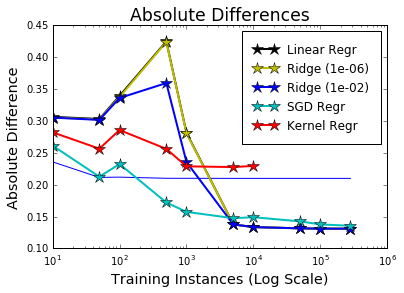

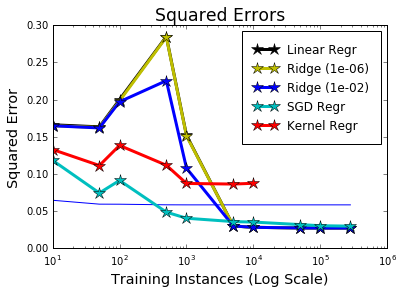

In [3]:
# Using raw data from earlier, compute the first two plots.
# YES, we want it both clipped AND standardized!

### First *absolute difference* plot
median = np.mean((median_1, median_2, median_3),axis=0)
abs_lin = np.mean((abs_lin_1, abs_lin_2, abs_lin_3),axis=0)
abs_r10 = np.mean((abs_r10_1, abs_r10_2, abs_r10_3),axis=0)
abs_r02 = np.mean((abs_r02_1, abs_r02_2, abs_r02_3),axis=0)
abs_r06 = np.mean((abs_r06_1, abs_r06_2, abs_r06_3),axis=0)
abs_sgd = np.mean((abs_sgd_1, abs_sgd_2, abs_sgd_3),axis=0)
abs_ker = np.mean((abs_ker_1, abs_ker_2, abs_ker_3),axis=0)

plt.figure()
plt.title('Absolute Differences', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')

plt.plot(train_sizes, median)
plt.plot(train_sizes, abs_lin, 'k*-', markersize=12, linewidth=2, label='Linear Regr')
#plt.plot(train_sizes, abs_r10, 'g*-', markersize=12, linewidth=2, label='Ridge (1e-12)')
plt.plot(train_sizes, abs_r06, 'y*-', markersize=12, linewidth=2, label='Ridge (1e-06)')
plt.plot(train_sizes, abs_r02, 'b*-', markersize=12, linewidth=2, label='Ridge (1e-02)')
plt.plot(train_sizes, abs_sgd, 'c*-', markersize=12, linewidth=2, label='SGD Regr')
plt.plot(train_kernels, abs_ker, 'r*-', markersize=12, linewidth=2, label='Kernel Regr')

plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_absdiff.png')


### First *squared error difference* plot
mean = np.mean((mean_1, mean_2, mean_3),axis=0)
sqr_lin = np.mean((sqr_lin_1, sqr_lin_2, sqr_lin_3),axis=0)
sqr_r10 = np.mean((sqr_r10_1, sqr_r10_2, sqr_r10_3),axis=0)
sqr_r02 = np.mean((sqr_r02_1, sqr_r02_2, sqr_r02_3),axis=0)
sqr_r06 = np.mean((sqr_r06_1, sqr_r06_2, sqr_r06_3),axis=0)
sqr_sgd = np.mean((sqr_sgd_1, sqr_sgd_2, sqr_sgd_3),axis=0)
sqr_ker = np.mean((sqr_ker_1, sqr_ker_2, sqr_ker_3),axis=0)

plt.figure()
plt.title('Squared Errors', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Squared Error', size='x-large')
plt.xscale('log')

plt.plot(train_sizes, mean)
plt.plot(train_sizes, sqr_lin, 'k*-', markersize=12, linewidth=3, label='Linear Regr')
#plt.plot(train_sizes, sqr_r10, 'g*-', markersize=12, linewidth=3, label='Ridge (1e-12)')
plt.plot(train_sizes, sqr_r06, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-06)')
plt.plot(train_sizes, sqr_r02, 'b*-', markersize=12, linewidth=3, label='Ridge (1e-02)')
plt.plot(train_sizes, sqr_sgd, 'c*-', markersize=12, linewidth=3, label='SGD Regr')
plt.plot(train_kernels, sqr_ker, 'r*-', markersize=12, linewidth=3, label='Kernel Regr')

plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_sqrdiff.png')

10000
763


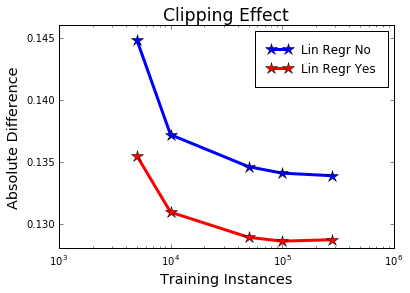

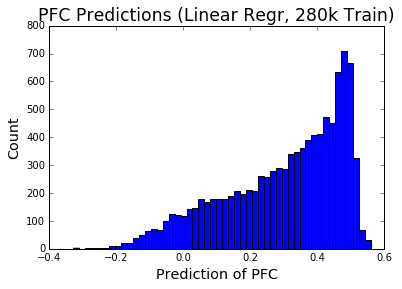

In [4]:
# Now let's investigate the effect of clipping, from Trial 1.

train = [5000,10000,50000,100000,280000]
lin_no = [0.144799, 0.137177, 0.134596, 0.134076, 0.133868]
lin_yes = [0.135461, 0.13093, 0.128901, 0.12859, 0.128707]
ridge_no = [0.144758, 0.137208, 0.134564, 0.134012, 0.133866]
ridge_yes = [0.135493, 0.130965, 0.129035, 0.128648, 0.12875]

# First, let's visually inspect the difference.
plt.figure()
plt.title('Clipping Effect', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.plot(train, lin_no, 'b*-', markersize=12, linewidth=3, label='Lin Regr No')
plt.plot(train, lin_yes, 'r*-', markersize=12, linewidth=3, label='Lin Regr Yes')
#plt.plot(train, ridge_no, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-2) No')
#plt.plot(train, ridge_yes, 'c*-', markersize=12, linewidth=3, label='Ridge (1e-2) Yes')
plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_clipping_effect.png')

# Second, the distribution of predictions (this is simple).
predictions = np.loadtxt('predictions_Linear Regression.txt')
plt.figure()
plt.title('PFC Predictions (Linear Regr, 280k Train)', size='xx-large')
plt.xlabel('Prediction of PFC', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(predictions, bins=50)
plt.savefig('fig_predictions_clipping.png')

print len(predictions)
print len(np.where(predictions < 0)[0])

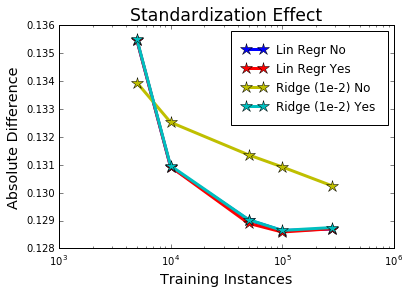

In [5]:
# Now standardization, from Trial 1.

train = [5000,10000,50000,100000,280000]
lin_no = [0.135458, 0.130926, 0.129022, 0.128642, 0.128698]
lin_yes = [ 0.135461, 0.13093, 0.128901, 0.12859, 0.128707]
ridge_no = [0.133942, 0.132523, 0.131355, 0.130923, 0.130246]
ridge_yes = [0.135493, 0.130965, 0.129035, 0.128648, 0.12875]
sgd_no = [0.1368, 0.135974, 0.132695, 0.133848, 0.132828]
sgd_yes = [0.14661, 0.141834, 0.146773, 0.133694, 0.132174]

plt.figure()
plt.title('Standardization Effect', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.plot(train, lin_no, 'b*-', markersize=12, linewidth=3, label='Lin Regr No')
plt.plot(train, lin_yes, 'r*-', markersize=12, linewidth=3, label='Lin Regr Yes')
plt.plot(train, ridge_no, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-2) No')
plt.plot(train, ridge_yes, 'c*-', markersize=12, linewidth=3, label='Ridge (1e-2) Yes')
#plt.plot(train, sgd_no, 'k*-', markersize=12, linewidth=3, label='SGD Regr No')
#plt.plot(train, sgd_yes, 'g*-', markersize=12, linewidth=3, label='SGD Regr Yes')
plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_standardization_effect.png')

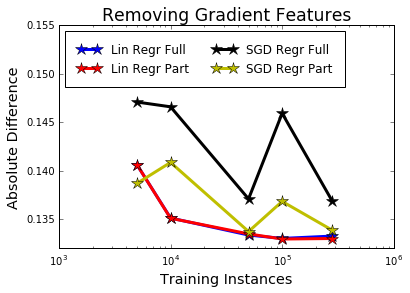

In [6]:
# Now the effect of removing gradx, grady from BOTH wrenches, from Trial 4.

train = [5000,10000,50000,100000,280000]

lin_part = [0.140635, 0.135113, 0.133503, 0.132974, 0.133027]
lin_full = [0.140635, 0.135139, 0.133385, 0.133036, 0.133276]
rid_part = [0.140635, 0.135139, 0.13344, 0.132995, 0.133097]
rid_full = [0.140635, 0.135139, 0.13344, 0.132995, 0.133097]
sgd_part = [0.138707, 0.140866, 0.133746, 0.136849, 0.133895]
sgd_full = [0.14709, 0.146598, 0.137108, 0.145926, 0.136917]

plt.figure()
plt.title('Removing Gradient Features', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.ylim([0.132,0.155])

plt.plot(train, lin_full, 'b*-', markersize=12, linewidth=3, label='Lin Regr Full')
plt.plot(train, lin_part, 'r*-', markersize=12, linewidth=3, label='Lin Regr Part')
#plt.plot(train, rid_full, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-6) Full')
#plt.plot(train, rid_part, 'c*-', markersize=12, linewidth=3, label='Ridge (1e-6) Part')
plt.plot(train, sgd_full, 'k*-', markersize=12, linewidth=3, label='SGD Regr Full')
plt.plot(train, sgd_part, 'y*-', markersize=12, linewidth=3, label='SGD Regr Part')

plt.legend(loc='upper left', borderpad=1, scatterpoints=1, ncol=2)
plt.savefig('fig_remove_gradients.png')

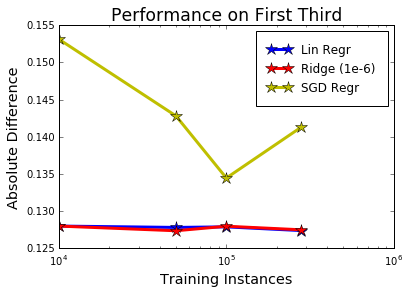

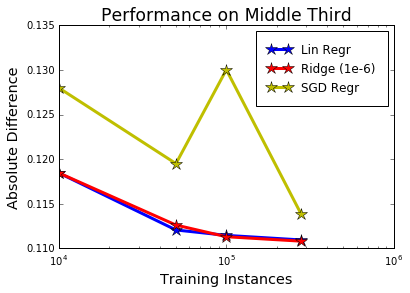

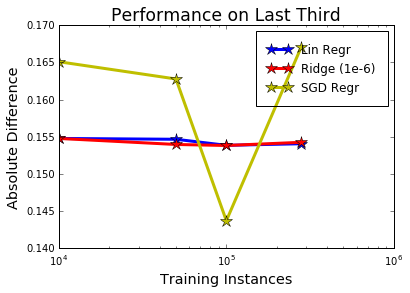

In [7]:
# Last thing (for now), about the 'bucketing' into groups.

train = [10000, 50000, 100000, 280000]

# First third
lin_first = [0.1280114, 0.127829, 0.127905, 0.127406]
rid_first = [0.128011, 0.127383, 0.12799, 0.127509]
sgd_first = [0.153119, 0.142816, 0.134468, 0.141304]
plt.figure()
plt.title('Performance on First Third', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.plot(train, lin_first, 'b*-', markersize=12, linewidth=3, label='Lin Regr')
plt.plot(train, rid_first, 'r*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(train, sgd_first, 'y*-', markersize=12, linewidth=3, label='SGD Regr')
plt.legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)
plt.savefig('fig_thirds_first.png')

# Middle third
lin_second = [0.118457, 0.112072, 0.111468, 0.110955]
rid_second = [0.118457, 0.112624, 0.111315, 0.110818]
sgd_second = [0.127981, 0.119505, 0.13002, 0.113836]
plt.figure()
plt.title('Performance on Middle Third', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.plot(train, lin_second, 'b*-', markersize=12, linewidth=3, label='Lin Regr')
plt.plot(train, rid_second, 'r*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(train, sgd_second, 'y*-', markersize=12, linewidth=3, label='SGD Regr')
plt.legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)
plt.savefig('fig_thirds_second.png')

# Last Third
lin_third = [0.154788, 0.154678, 0.153864, 0.154078]
rid_third = [0.154788, 0.153979, 0.153842, 0.15427]
sgd_third = [0.165097, 0.162781, 0.14373, 0.16706]
plt.figure()
plt.title('Performance on Last Third', size='xx-large')
plt.xlabel('Training Instances', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')
plt.plot(train, lin_third, 'b*-', markersize=12, linewidth=3, label='Lin Regr')
plt.plot(train, rid_third, 'r*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(train, sgd_third, 'y*-', markersize=12, linewidth=3, label='SGD Regr')
plt.legend(loc='upper right', borderpad=1, scatterpoints=1, ncol=1)
plt.savefig('fig_thirds_third.png')

(array([   1.,    1.,    1.,    0.,    2.,    0.,    2.,    3.,   10.,
          12.,   22.,   30.,   54.,   81.,  106.,  154.,  220.,  275.,
         324.,  363.,  441.,  455.,  452.,  463.,  385.,  331.,  326.,
         284.,  277.,  292.,  289.,  270.,  292.,  311.,  305.,  309.,
         308.,  306.,  296.,  339.,  310.,  291.,  270.,  230.,  199.,
         143.,   84.,   61.,   16.,    4.]),
 array([-0.34002623, -0.31798523, -0.29594422, -0.27390322, -0.25186221,
        -0.2298212 , -0.2077802 , -0.18573919, -0.16369819, -0.14165718,
        -0.11961618, -0.09757517, -0.07553417, -0.05349316, -0.03145216,
        -0.00941115,  0.01262985,  0.03467086,  0.05671186,  0.07875287,
         0.10079387,  0.12283488,  0.14487588,  0.16691689,  0.1889579 ,
         0.2109989 ,  0.23303991,  0.25508091,  0.27712192,  0.29916292,
         0.32120393,  0.34324493,  0.36528594,  0.38732694,  0.40936795,
         0.43140895,  0.45344996,  0.47549096,  0.49753197,  0.51957297,
         0.54161

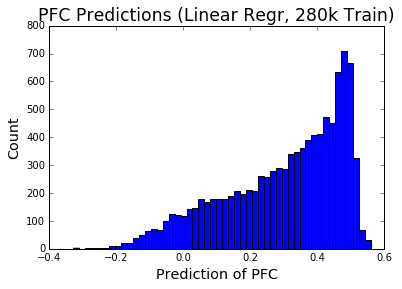

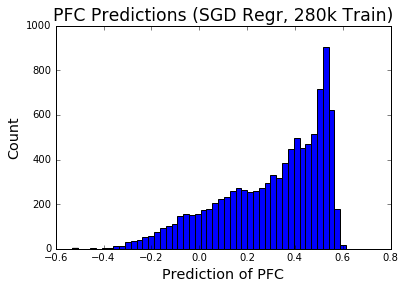

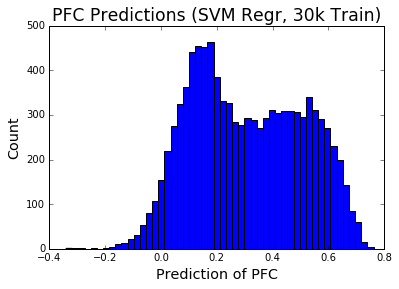

In [8]:
# OK, new stuff on January 11. Let's get the three histograms ready.
# NOTE these rely on the file names here. Given that they get changed, I'm
# commenting out the plot saving so that these don't get overridden.

predictions = np.loadtxt('predictions_Linear Regression.txt')
plt.figure()
plt.title('PFC Predictions (Linear Regr, 280k Train)', size='xx-large')
plt.xlabel('Prediction of PFC', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(predictions, bins=50)
#plt.savefig('fig_preds_lin.png')

predictions = np.loadtxt('predictions_SGD Regressor (Huber, L2).txt')
plt.figure()
plt.title('PFC Predictions (SGD Regr, 280k Train)', size='xx-large')
plt.xlabel('Prediction of PFC', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(predictions, bins=50)
#plt.savefig('fig_preds_sgd.png')

predictions = np.loadtxt('predictions_SVM Regression (RBF).txt')
plt.figure()
plt.title('PFC Predictions (SVM Regr, 30k Train)', size='xx-large')
plt.xlabel('Prediction of PFC', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(predictions, bins=50)
#plt.savefig('fig_preds_svm.png')

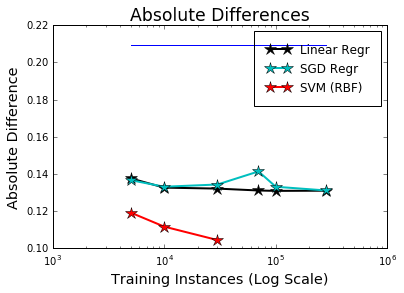

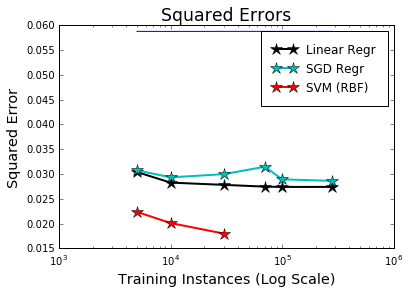

In [9]:
# Now the other two plots for Jan 11.

train_sizes = [5000, 10000, 30000, 70000, 100000, 280000]
train_smaller = [5000,10000,30000]

### First *absolute difference* plot
abs_lin = [0.137712, 0.132716, 0.132191, 0.131173, 0.130967, 0.131073]
abs_sgd = [0.136739, 0.133196, 0.134393, 0.141426, 0.133186, 0.131199]
abs_svm = [0.119306, 0.111754, 0.104532]
median = [0.20955, 0.20955, 0.20955, 0.20955, 0.20955,  0.20955]

plt.figure()
plt.title('Absolute Differences', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Absolute Difference', size='x-large')
plt.xscale('log')

plt.plot(train_sizes, median)
plt.plot(train_sizes, abs_lin, 'k*-', markersize=12, linewidth=2, label='Linear Regr')
plt.plot(train_sizes, abs_sgd, 'c*-', markersize=12, linewidth=2, label='SGD Regr')
plt.plot(train_smaller, abs_svm, 'r*-', markersize=12, linewidth=2, label='SVM (RBF)')

plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_absdiff_svm.png')


### First *squared error difference* plot
sqr_lin = [0.030412, 0.02828, 0.027825, 0.02747, 0.027409, 0.027414]
sqr_sgd = [0.03075, 0.029341, 0.02998, 0.031483, 0.028938, 0.028631]
sqr_svm = [0.022373, 0.020125, 0.018002]
mean = [0.05877, 0.05876, 0.05877, 0.05877, 0.05877, 0.05877]

plt.figure()
plt.title('Squared Errors', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Squared Error', size='x-large')
plt.xscale('log')

plt.plot(train_sizes, mean)
plt.plot(train_sizes, sqr_lin, 'k*-', markersize=12, linewidth=2, label='Linear Regr')
plt.plot(train_sizes, sqr_sgd, 'c*-', markersize=12, linewidth=2, label='SGD Regr')
plt.plot(train_smaller, sqr_svm, 'r*-', markersize=12, linewidth=2, label='SVM (RBF)')

plt.legend(loc='upper right', borderpad=1, scatterpoints=1)
plt.savefig('fig_sqrdiff_svm.png')

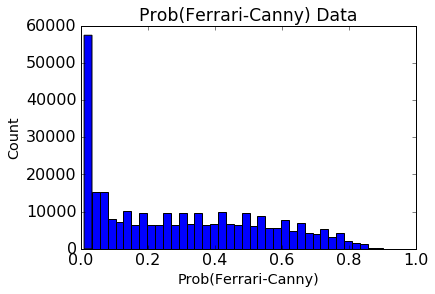

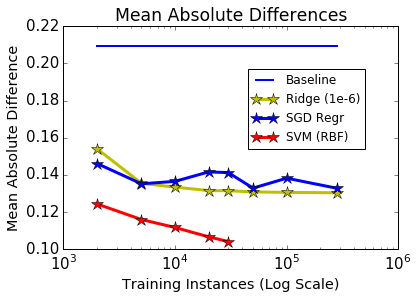

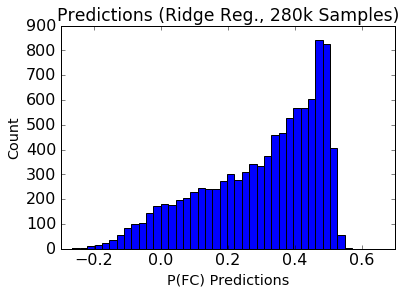

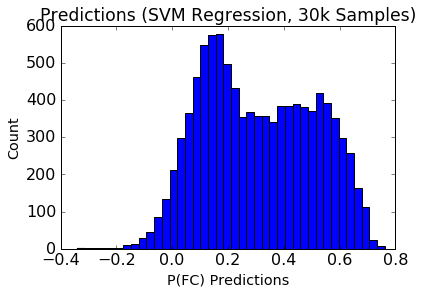

In [10]:
###### OK let's try and get some slides ready. First, a nice histogram.
pfc = np.load('pfc.npy')
plt.figure()
plt.title('Prob(Ferrari-Canny) Data', size='xx-large')
plt.xlabel('Prob(Ferrari-Canny)', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(pfc, bins=40)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('slides_pfc.png')

###### Then let's try to get the MAE plot
training_sizes = [2000, 5000, 10000, 20000, 30000, 50000, 100000, 280000]
abs_rid = [0.154045, 0.135493, 0.133444, 0.131556, 0.131498, 0.130882, 0.130607, 0.130388]
abs_sgd = [0.146121, 0.135217, 0.136536, 0.141625, 0.14123, 0.132904, 0.138246, 0.132857]
abs_svm = [0.124372, 0.116013, 0.11173, 0.106705, 0.104184]
median  = 0.20946*np.ones(len(training_sizes))

plt.figure()
plt.title('Mean Absolute Differences', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Mean Absolute Difference', size='x-large')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.plot(training_sizes, median, linewidth=2, label='Baseline')
plt.plot(training_sizes, abs_rid, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(training_sizes, abs_sgd, 'b*-', markersize=12, linewidth=3, label='SGD Regr')
plt.plot(training_sizes[:5], abs_svm, 'r*-', markersize=12, linewidth=3, label='SVM (RBF)')

plt.legend(loc=(0.55,0.45), scatterpoints=1)
plt.savefig('slides_absdiff_svm.png')

###### Two more histograms, showing why the SVM Regression predicts the better data distribution
data1 = np.loadtxt('predictions_Ridge Regression (alpha = 1e-6).txt')
plt.figure()
plt.title('Predictions (Ridge Reg., 280k Samples)', size='xx-large')
plt.xlabel('P(FC) Predictions', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(data1, bins=40)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('slides_pfc_1.png')

data2 = np.loadtxt('predictions_SVM Regression (RBF).txt')
plt.figure()
plt.title('Predictions (SVM Regression, 30k Samples)', size='xx-large')
plt.xlabel('P(FC) Predictions', size='x-large')
plt.ylabel('Count', size='x-large')
plt.hist(data2, bins=40)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('slides_pfc_2.png')

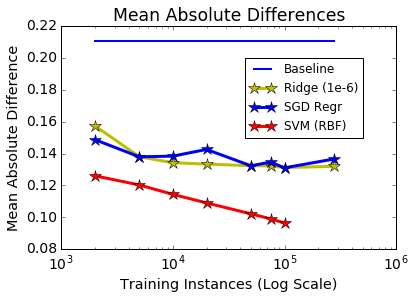

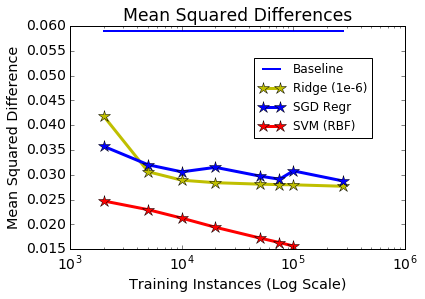

In [11]:
### January 14, 2016
# Now let's update the two plots with the 50k data for the SVM RBF Kernel.
# Then I'll have to get to work understanding Theano. (Not caffe ...)

# Let's try to get the MAE plot
training_sizes = [2000, 5000, 10000, 20000, 50000, 75000, 100000, 280000]
abs_rid = [0.157367, 0.137984, 0.134236, 0.13337, 0.132352, 0.132228, 0.131208, 0.131968]
abs_sgd = [0.148689, 0.137932, 0.138383, 0.142564, 0.132293, 0.134648, 0.131022, 0.136622]
abs_svm = [0.126021, 0.120288, 0.114377, 0.109029, 0.102181, 0.099042, 0.096395]
median  = 0.21078*np.ones(len(training_sizes))

plt.figure()
plt.title('Mean Absolute Differences', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Mean Absolute Difference', size='x-large')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.plot(training_sizes, median, linewidth=2, label='Baseline')
plt.plot(training_sizes, abs_rid, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(training_sizes, abs_sgd, 'b*-', markersize=12, linewidth=3, label='SGD Regr')
plt.plot(training_sizes[:len(abs_svm)], abs_svm, 'r*-', markersize=12, linewidth=3, label='SVM (RBF)')

plt.legend(loc=(0.55,0.5), scatterpoints=1)
plt.savefig('fig_absdiff_svm_jan14.png')

# Now the MSE Plot
sqr_rid = [0.041794, 0.030612, 0.028909, 0.028405, 0.02811, 0.028012, 0.027978, 0.027686]
sqr_sgd = [0.035732, 0.032017, 0.030592, 0.031503, 0.029745, 0.029106, 0.030786, 0.02874]
sqr_svm = [0.02472, 0.022964, 0.021261, 0.019422, 0.017252, 0.01634, 0.015635]
mean = 0.05901*np.ones(len(training_sizes))

plt.figure()
plt.title('Mean Squared Differences', size='xx-large')
plt.xlabel('Training Instances (Log Scale)', size='x-large')
plt.ylabel('Mean Squared Difference', size='x-large')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.plot(training_sizes, mean, linewidth=2, label='Baseline')
plt.plot(training_sizes, sqr_rid, 'y*-', markersize=12, linewidth=3, label='Ridge (1e-6)')
plt.plot(training_sizes, sqr_sgd, 'b*-', markersize=12, linewidth=3, label='SGD Regr')
plt.plot(training_sizes[:len(sqr_svm)], sqr_svm, 'r*-', markersize=12, linewidth=3, label='SVM (RBF)')

plt.legend(loc=(0.55,0.5), scatterpoints=1)
plt.savefig('fig_sqrdiff_svm_jan14.png')